In [16]:
!which python

/Users/priya/Downloads/UC Davis/Assignments/venv/bin/python


In [1]:
pip install -r requirements.txt

You should consider upgrading via the '/Users/priya/Downloads/UC Davis/Assignments/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Input the dish item from the user

Open the search result from Doordash website

In [ ]:
import undetected_chromedriver as uc
import chromedriver_py
import time
import random
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("start-maximized")
options.add_argument("disable-infobars")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.6943.142 Safari/537.36")

driver_path = chromedriver_py.binary_path

driver = uc.Chrome(driver_executable_path=driver_path, options=options)

search_input = input("Enter the store type or keyword to search on DoorDash (e.g., 'sushi'): ")
url = f"https://www.doordash.com/search/store/{search_input}?event_type=search"
driver.get(url)

time.sleep(random.uniform(2, 4))

driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")

time.sleep(random.uniform(2, 4))

input("Press Enter to close the browser...")
driver.quit()


This page has a lot of restaurants that serves sushi

- Fetch the restaurant id from the element

In [ ]:
import undetected_chromedriver as uc 
import chromedriver_py
import time
import random
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

options = Options()
options.add_argument("start-maximized")
options.add_argument("disable-infobars")
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36")

driver_path = chromedriver_py.binary_path

driver = uc.Chrome(executable_path=driver_path, options=options, timeout=200)

search_input = input("Enter the store type or keyword to search on DoorDash (e.g., 'sushi'): ")
url = f"https://www.doordash.com/search/store/{search_input}?event_type=search"
driver.get(url)

time.sleep(random.uniform(3, 5)) 

driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")

time.sleep(random.uniform(3, 5))

# Fetch all restaurant ID links
try:
    restaurant_elements = driver.find_elements(By.XPATH, "//a[starts-with(@href, '/store/')]")
    
    restaurant_ids = []
    for element in restaurant_elements:
        href = element.get_attribute('href')
        if '/store/' in href:
            restaurant_id = href.split('/store/')[1].split('?')[0]
            restaurant_ids.append(restaurant_id)

    unique_restaurant_ids = list(set(restaurant_ids))

    # Print the first 5 unique restaurant IDs
    print(f"First 5 restaurant IDs for '{search_input}':")
    for restaurant_id in unique_restaurant_ids[:5]:
        print(restaurant_id)

    print(f"\nTotal number of unique restaurant IDs found: {len(unique_restaurant_ids)}")

except Exception as e:
    print(f"Error extracting restaurant IDs: {e}")

input("\nPress Enter to close the browser...")

driver.quit()


First 5 restaurant IDs for 'burger':
240203
720446
1206749
1302773
852928

Total number of unique restaurant IDs found: 10


Create a JSON for every restaurant and append all the details - ID, Name, Ratings, No of Ratings, Delivery Time, Distance

In [6]:
'''

We need to skip processing for the convenience stores :
- Safeway
- Target
- Grocery Outlet
- Savemart
- Sprouts Farmers Market

Add type in the json : Restaurant / Convenience Store

'''


'\n\nWe need to skip processing for the convenience stores :\n- Safeway\n- Target\n- Grocery Outlet\n- Savemart\n- Sprouts Farmers Market\n\nAdd type in the json : Restaurant / Convenience Store\n\n'

In [ ]:
import undetected_chromedriver as uc  
import chromedriver_py 
import time
import random
import json
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

options = Options()

options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36")

driver_path = chromedriver_py.binary_path

driver = uc.Chrome(executable_path=driver_path, options=options, timeout=120)

search_input = input("Enter the store type or keyword to search on DoorDash (e.g., 'sushi'): ")
url = f"https://www.doordash.com/search/store/{search_input}?event_type=search&filterQuery-vertical_ids=1"
driver.get(url)

time.sleep(random.uniform(2, 4)) 

driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")

time.sleep(random.uniform(2, 4))

restaurants_data = {}

try:
    restaurant_links = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.XPATH, "//a[starts-with(@href, '/store/') or starts-with(@href, '/convenience/store/')]"))
    )
    
    for link in restaurant_links:
        try:
            href = link.get_attribute('href')
            restaurant_id = href.split('/store/')[-1].split('?')[0]

            # print('href : ', href)

            # if restaurant_id in restaurants_data:
            #     continue
            
            try:
                restaurant_name = link.find_element(By.XPATH, ".//span[@data-telemetry-id='store.name']").text.strip()
            except:
                restaurant_name = 'Unknown'
            
            try:
                rating = link.find_element(By.XPATH, ".//span[contains(@class, 'sc-cfbb81c7-1') and contains(@class, 'sc-cfbb81c7-2')]").text.strip()
            except:
                rating = 'N/A'
            
            if '/convenience/store/' in href:
                store_type = 'Convenience Store'
            else:
                store_type = 'Restaurant'
            
            try:
                # no_of_ratings = link.find_elements(By.XPATH, ".//span[contains(@class, 'sc-cfbb81c7-1')]").text.strip('()')[1]

                no_of_ratings_element = link.find_element(By.XPATH, ".//span[contains(@class, 'sc-cfbb81c7-1') and contains(text(), '(')]")
                no_of_ratings = no_of_ratings_element.text.strip()
                no_of_ratings = no_of_ratings.strip('()')

            except:
                no_of_ratings = 'N/A'
            
            try:
                distance = link.find_element(By.XPATH, ".//span[contains(@class, 'sc-ab1e2fe8-18') and contains(text(), 'mi')]").text.strip()
            except:
                distance = 'N/A'
            
            try:
                delivery_time = link.find_element(By.XPATH, ".//span[contains(@class, 'sc-ab1e2fe8-18') and contains(text(), 'min')]").text.strip()
            except:
                delivery_time = 'N/A'
            
            restaurants_data[restaurant_id] = {
                "restaurant_id": restaurant_id,
                "restaurant_name": restaurant_name,
                "type": store_type,
                "ratings": rating,
                "no_of_ratings": no_of_ratings,
                "distance": distance,
                "delivery_time": delivery_time,
                "URL": href,
                "menu": []
            }
        
        except Exception as link_error:
            print(f"Error processing restaurant link: {link_error}")
    
    restaurants_list = list(restaurants_data.values())
    print(f"Restaurants found for '{search_input}':")
    for restaurant in restaurants_list:
        print(restaurant)
    
    print(f"\nTotal number of restaurants found: {len(restaurants_data)}")

    with open(f"doordash_{search_input}_{time.strftime('%Y%m%d_%H%M%S')}.json", "w") as f:
        json.dump(restaurants_data, f, indent=4)
    print(f"Data saved to JSON file")

except Exception as e:
    print(f"Error extracting restaurant data: {e}")

input("\nPress Enter to close the browser...")

driver.quit()

Restaurants found for 'pizza':
{'restaurant_id': '244402', 'restaurant_name': "Woodstock's Pizza", 'type': 'Restaurant', 'ratings': '4.6', 'no_of_ratings': '6k+', 'distance': '0.8 mi', 'delivery_time': '32 min', 'URL': 'https://www.doordash.com/store/244402?cursor=eyJzZWFyY2hfaXRlbV9jYXJvdXNlbF9jdXJzb3IiOnsicXVlcnkiOiJwaXp6YSIsIml0ZW1faWRzIjpbXSwic2VhcmNoX3Rlcm0iOiJwaXp6YSIsInZlcnRpY2FsX2lkIjoxLCJ2ZXJ0aWNhbF9uYW1lIjoicmVzdGF1cmFudCJ9fQ==&pickup=false', 'menu': []}
{'restaurant_id': '240198', 'restaurant_name': 'Blaze Pizza', 'type': 'Restaurant', 'ratings': '4.6', 'no_of_ratings': '10k+', 'distance': '0.8 mi', 'delivery_time': '24 min', 'URL': 'https://www.doordash.com/store/240198?cursor=eyJzZWFyY2hfaXRlbV9jYXJvdXNlbF9jdXJzb3IiOnsicXVlcnkiOiJwaXp6YSIsIml0ZW1faWRzIjpbXSwic2VhcmNoX3Rlcm0iOiJwaXp6YSIsInZlcnRpY2FsX2lkIjoxLCJ2ZXJ0aWNhbF9uYW1lIjoicmVzdGF1cmFudCJ9fQ==&pickup=false', 'menu': []}
{'restaurant_id': '27727532', 'restaurant_name': 'Square Pie Guys', 'type': 'Restaurant', 'ratings

In [ ]:
# Burger

import undetected_chromedriver as uc 
import chromedriver_py 
import time
import random
import json
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

options = Options()

options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36")

driver_path = chromedriver_py.binary_path

driver = uc.Chrome(executable_path=driver_path, options=options, timeout=150)

search_input = input("Enter the store type or keyword to search on DoorDash (e.g., 'sushi'): ")
url = f"https://www.doordash.com/search/store/{search_input}?event_type=search&filterQuery-vertical_ids=1"
driver.get(url)

time.sleep(random.uniform(3, 5)) 

driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")

time.sleep(random.uniform(3, 5))

restaurants_data = {}

try:
    restaurant_links = WebDriverWait(driver, 20).until(
        EC.presence_of_all_elements_located((By.XPATH, "//a[starts-with(@href, '/store/') or starts-with(@href, '/convenience/store/')]"))
    )
    
    for link in restaurant_links:
        # print('link :', link)
        try:
            href = link.get_attribute('href')
            restaurant_id = href.split('/store/')[-1].split('?')[0]

            try:
                restaurant_name = link.find_element(By.XPATH, ".//span[@data-telemetry-id='store.name']").text.strip()
            except:
                restaurant_name = 'Unknown'
            
            try:
                rating = link.find_element(By.XPATH, ".//span[contains(@class, 'sc-cfbb81c7-1') and contains(@class, 'sc-cfbb81c7-2')]").text.strip()
            except:
                rating = 'N/A'
            
            if '/convenience/store/' in href:
                store_type = 'Convenience Store'
            else:
                store_type = 'Restaurant'
            
            try:
                # no_of_ratings = link.find_elements(By.XPATH, ".//span[contains(@class, 'sc-cfbb81c7-1')]").text.strip('()')[1]

                no_of_ratings_element = link.find_element(By.XPATH, ".//span[contains(@class, 'sc-cfbb81c7-1') and contains(text(), '(')]")
                no_of_ratings = no_of_ratings_element.text.strip()
                no_of_ratings = no_of_ratings.strip('()')

            except:
                no_of_ratings = 'N/A'
            
            try:
                distance = link.find_element(By.XPATH, ".//span[contains(@class, 'sc-ab1e2fe8-18') and contains(text(), 'mi')]").text.strip()
            except:
                distance = 'N/A'
            
            try:
                delivery_time = link.find_element(By.XPATH, ".//span[contains(@class, 'sc-ab1e2fe8-18') and contains(text(), 'min')]").text.strip()
            except:
                delivery_time = 'N/A'
            
            restaurants_data[restaurant_id] = {
                "restaurant_id": restaurant_id,
                "restaurant_name": restaurant_name,
                "type": store_type,
                "ratings": rating,
                "no_of_ratings": no_of_ratings,
                "distance": distance,
                "delivery_time": delivery_time,
                "URL": href,
                "menu": []
            }
        
        except Exception as link_error:
            print(f"Error processing restaurant link: {link_error}")
    
    restaurants_list = list(restaurants_data.values())
    print(f"Restaurants found for '{search_input}':")
    for restaurant in restaurants_list:
        print(restaurant)
    
    print(f"\nTotal number of restaurants found: {len(restaurants_data)}")

    with open(f"doordash_{search_input}_{time.strftime('%Y%m%d_%H%M%S')}.json", "w") as f:
        json.dump(restaurants_data, f, indent=4)
    print(f"Data saved to JSON file")

except Exception as e:
    print(f"Error extracting restaurant data: {e}")

input("\nPress Enter to close the browser...")
driver.quit()

Restaurants found for 'burger':
{'restaurant_id': '240203', 'restaurant_name': 'Burgers and Brew', 'type': 'Restaurant', 'ratings': '4.6', 'no_of_ratings': '10k+', 'distance': '0.8 mi', 'delivery_time': '23 min', 'URL': 'https://www.doordash.com/store/240203?cursor=eyJzZWFyY2hfaXRlbV9jYXJvdXNlbF9jdXJzb3IiOnsicXVlcnkiOiJidXJnZXIiLCJpdGVtX2lkcyI6W10sInNlYXJjaF90ZXJtIjoiYnVyZ2VyIiwidmVydGljYWxfaWQiOjEsInZlcnRpY2FsX25hbWUiOiJyZXN0YXVyYW50In0sInN0b3JlX3ByaW1hcnlfdmVydGljYWxfaWRzIjpbMSw0LDE3NiwxNzcsMTkzLDE5NV19&pickup=false', 'menu': []}
{'restaurant_id': '26273153', 'restaurant_name': 'Outpost Burger', 'type': 'Restaurant', 'ratings': '4.8', 'no_of_ratings': '500+', 'distance': '0.7 mi', 'delivery_time': '18 min', 'URL': 'https://www.doordash.com/store/26273153?cursor=eyJzZWFyY2hfaXRlbV9jYXJvdXNlbF9jdXJzb3IiOnsicXVlcnkiOiJidXJnZXIiLCJpdGVtX2lkcyI6W10sInNlYXJjaF90ZXJtIjoiYnVyZ2VyIiwidmVydGljYWxfaWQiOjEsInZlcnRpY2FsX25hbWUiOiJyZXN0YXVyYW50In0sInN0b3JlX3ByaW1hcnlfdmVydGljYWxfaWRzIjpbMSw0LDE3N1

In [ ]:
import undetected_chromedriver as uc
import chromedriver_py
import time
import random
import json
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, StaleElementReferenceException, NoSuchElementException

options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36")

driver_path = chromedriver_py.binary_path

driver = uc.Chrome(executable_path=driver_path, options=options, timeout=120)

search_input = input("Enter the store type or keyword to search on DoorDash (e.g., 'sushi'): ")
url = f"https://www.doordash.com/search/store/{search_input}?event_type=search&filterQuery-vertical_ids=1"
driver.get(url)

time.sleep(random.uniform(3, 5)) 

driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")

restaurants_data = {}

def scroll_until_target_or_no_more_results():
    """
    Scroll down the page until either:
    1. The "Get Your Favorite Spots on DoorDash" text is found
    2. No new restaurants are loaded after multiple attempts
    """
    print("Starting to scroll and fetch all restaurants...")
    
    previous_restaurant_count = 0
    consecutive_same_count = 0
    max_consecutive_same = 3
    target_text = "Get Your Favorite Spots on DoorDash"
    scroll_increment = 800 
    scroll_position = 0
    
    while consecutive_same_count < max_consecutive_same:
        try:
            target_element = driver.find_element(By.XPATH, f"//span[contains(text(), '{target_text}')]")
            print(f"Found the target text: '{target_text}'. Stopping scroll.")
            return driver.find_elements(By.XPATH, "//a[starts-with(@href, '/store/') or starts-with(@href, '/convenience/store/')]")
        except NoSuchElementException:
            pass
        
        scroll_position += scroll_increment
        driver.execute_script(f"window.scrollTo(0, {scroll_position});")
        
        time.sleep(random.uniform(1.5, 3))
        
        current_restaurant_count = len(driver.find_elements(By.XPATH, "//a[starts-with(@href, '/store/') or starts-with(@href, '/convenience/store/')]"))
        
        if current_restaurant_count == previous_restaurant_count:
            consecutive_same_count += 1
            print(f"No new restaurants loaded. Attempt {consecutive_same_count}/{max_consecutive_same}")
        else:
            consecutive_same_count = 0
            print(f"Loaded {current_restaurant_count} restaurants so far...")
        
        previous_restaurant_count = current_restaurant_count
    
    print(f"Finished loading. Found approximately {previous_restaurant_count} restaurant listings.")
    return driver.find_elements(By.XPATH, "//a[starts-with(@href, '/store/') or starts-with(@href, '/convenience/store/')]")

def process_restaurant_link(link):
    try:
        href = link.get_attribute('href')
        restaurant_id = href.split('/store/')[-1].split('?')[0]
        
        if restaurant_id in restaurants_data:
            return None
        
        try:
            restaurant_name = link.find_element(By.XPATH, ".//span[@data-telemetry-id='store.name']").text.strip()
        except Exception:
            restaurant_name = 'Unknown'
        
        try:
            rating = link.find_element(By.XPATH, ".//span[contains(@class, 'sc-cfbb81c7-1') and contains(@class, 'sc-cfbb81c7-2')]").text.strip()
        except Exception:
            rating = 'N/A'
        
        if '/convenience/store/' in href:
            store_type = 'Convenience Store'
        else:
            store_type = 'Restaurant'
        
        try:
            no_of_ratings_element = link.find_element(By.XPATH, ".//span[contains(@class, 'sc-cfbb81c7-1') and contains(text(), '(')]")
            no_of_ratings = no_of_ratings_element.text.strip()
            no_of_ratings = no_of_ratings.strip('()')
        except Exception:
            no_of_ratings = 'N/A'
        
        try:
            distance = link.find_element(By.XPATH, ".//span[contains(@class, 'sc-ab1e2fe8-18') and contains(text(), 'mi')]").text.strip()
        except Exception:
            distance = 'N/A'
        
        try:
            delivery_time = link.find_element(By.XPATH, ".//span[contains(@class, 'sc-ab1e2fe8-18') and contains(text(), 'min')]").text.strip()
        except Exception:
            delivery_time = 'N/A'
        
        return {
            "restaurant_id": restaurant_id,
            "restaurant_name": restaurant_name,
            "type": store_type,
            "ratings": rating,
            "no_of_ratings": no_of_ratings,
            "distance": distance,
            "delivery_time": delivery_time,
            "URL": href,
            "menu": []
        }
    
    except StaleElementReferenceException:
        print("Encountered stale element. Skipping this restaurant.")
        return None
    except Exception as link_error:
        print(f"Error processing restaurant link: {link_error}")
        return None

try:
    restaurant_links = scroll_until_target_or_no_more_results()
    
    print(f"Processing {len(restaurant_links)} restaurant listings...")
    
    for idx, link in enumerate(restaurant_links):
        if idx % 10 == 0:
            print(f"Processing restaurant {idx}/{len(restaurant_links)}...")
        
        restaurant_data = process_restaurant_link(link)
        if restaurant_data:
            restaurants_data[restaurant_data["restaurant_id"]] = restaurant_data
    
    restaurants_list = list(restaurants_data.values())
    print(f"\nRestaurants found for '{search_input}':")
    print(f"Total number of valid restaurants found: {len(restaurants_data)}")
    
    filename = f"doordash_{search_input}_{time.strftime('%Y%m%d_%H%M%S')}.json"
    with open(filename, "w") as f:
        json.dump(restaurants_data, f, indent=4)
    print(f"Data saved to JSON file: {filename}")

except Exception as e:
    print(f"Error extracting restaurant data: {e}")

input("\nPress Enter to close the browser...")

driver.quit()

Navigate into each restaurant through the url created from restaurant ID

In [ ]:
import undetected_chromedriver as uc 
import time
import random
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument("start-maximized")
options.add_argument("disable-infobars")
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36")

driver = uc.Chrome(options=options)

restaurant_id = '956708'
restaurant_url = f"https://www.doordash.com/store/{restaurant_id}"
driver.get(restaurant_url)

time.sleep(random.uniform(3, 7))

time.sleep(3)

updated_url = driver.current_url

url_parts = updated_url.split('/')

restaurant_name = url_parts[4] 

print(f"Restaurant Name: {restaurant_name}")
print(f"Restaurant ID: {restaurant_id}")

input("\nPress Enter to close the browser...")

driver.quit()


Restaurant Name: i-love-sushi-davis-956708
Restaurant ID: 956708


Search the item from the restaurant page

In [35]:
import undetected_chromedriver as uc
import chromedriver_py
import time
import random
import traceback
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, WebDriverException

# Set up Chrome options
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36")

# Get the ChromeDriver path using chromedriver_py
driver_path = chromedriver_py.binary_path

def navigate_and_search():
    # Initialize undetected ChromeDriver
    driver = None
    try:
        # Set up Chrome options to prevent timeout
        options.add_argument('--no-sandbox')
        options.add_argument('--disable-dev-shm-usage')
        
        # Initialize the driver with extended timeout
        driver = uc.Chrome(
            executable_path=driver_path, 
            options=options, 
            timeout=180  # Increased timeout to 3 minutes
        )
        
        # Set page load timeout
        driver.set_page_load_timeout(60)
        
        # Navigate to the restaurant URL
        restaurant_url = 'https://www.doordash.com/store/240255?cursor=eyJzZWFyY2hfaXRlbV9jYXJvdXNlbF9jdXJzb3IiOnsicXVlcnkiOiJzdXNoaSIsIml0ZW1faWRzIjpbXSwic2VhcmNoX3Rlcm0iOiJzdXNoaSIsInZlcnRpY2FsX2lkIjotOTk5LCJ2ZXJ0aWNhbF9uYW1lIjoiYWxsIn0sInN0b3JlX3ByaW1hcnlfdmVydGljYWxfaWRzIjpbMSw0LDE3N119&pickup=false'
        driver.get(restaurant_url)
        
        # Wait for page to load completely
        WebDriverWait(driver, 30).until(
            EC.presence_of_element_located((By.TAG_NAME, 'body'))
        )
        
        # Add random delay to mimic human behavior
        time.sleep(random.uniform(2, 4))
        
        # Find search input using multiple methods
        try:
            # Try WebDriverWait first
            search_bar = WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.XPATH, "//input[@id='item-search-field']"))
            )
        except TimeoutException:
            # Fallback to direct find_element
            search_bar = driver.find_element(By.XPATH, "//input[@id='item-search-field']")
        
        # Input search term
        search_input = input("Enter the item you want to search for: ")
        
        # Clear any existing text in the search bar
        search_bar.clear()
        
        # Enter the search term into the search bar
        search_bar.send_keys(search_input)
        
        # Press Enter to trigger the search
        search_bar.send_keys(Keys.RETURN)
        
        # Wait for search results to load
        time.sleep(random.uniform(2, 4))
        
        print(f"Search for '{search_input}' completed.")
        
        # Optional: Add a screenshot for verification
        driver.save_screenshot('search_results.png')
        
        return True
    
    except Exception as e:
        print("Detailed Error Information:")
        print(f"Error Type: {type(e).__name__}")
        print(f"Error Message: {str(e)}")
        print("\nFull Traceback:")
        traceback.print_exc()
        
        return False
    
    finally:
        # Ensure driver is closed
        if driver:
            driver.quit()

# Main execution
if __name__ == "__main__":
    try:
        success = navigate_and_search()
        
        if not success:
            print("Navigation and search failed.")
        
    except Exception as e:
        print(f"Unexpected error: {e}")

Search for 'sushi' completed.


Visualisations with the data scrapped

/var/folders/v2/p4pj9mdj47x4n7f33pfpttz00000gn/T/ipykernel_94598/2538655234.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["delivery_time"].fillna(df["delivery_time"].median(), inplace=True)


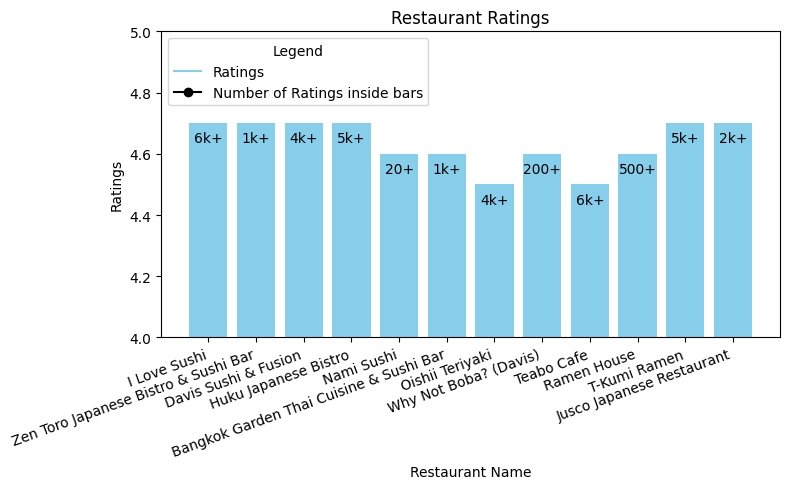

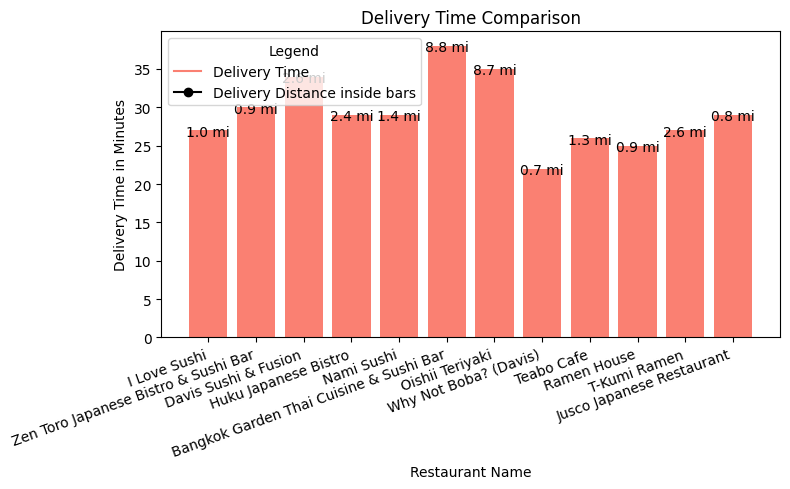

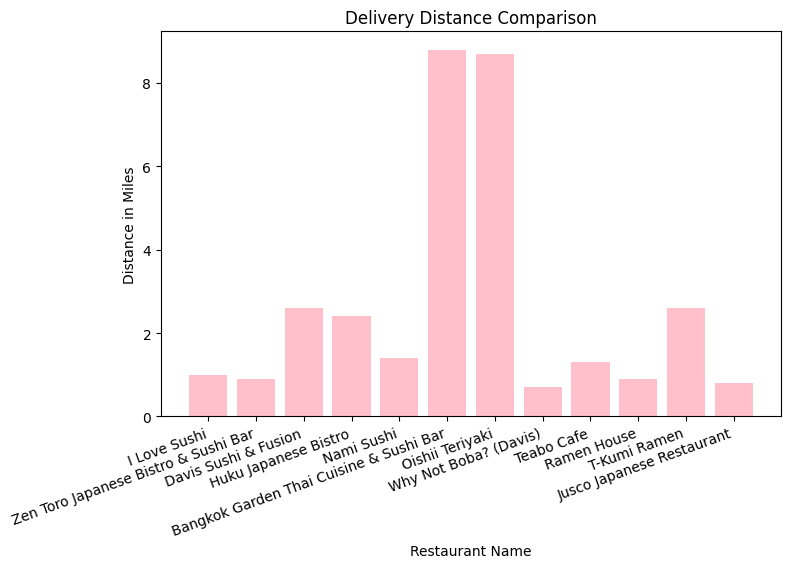

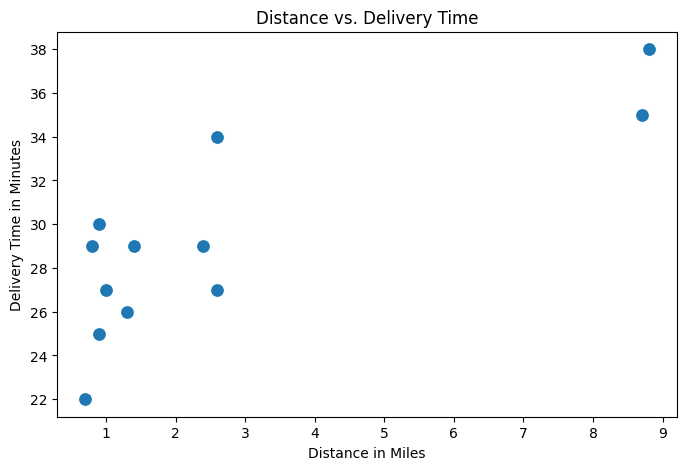

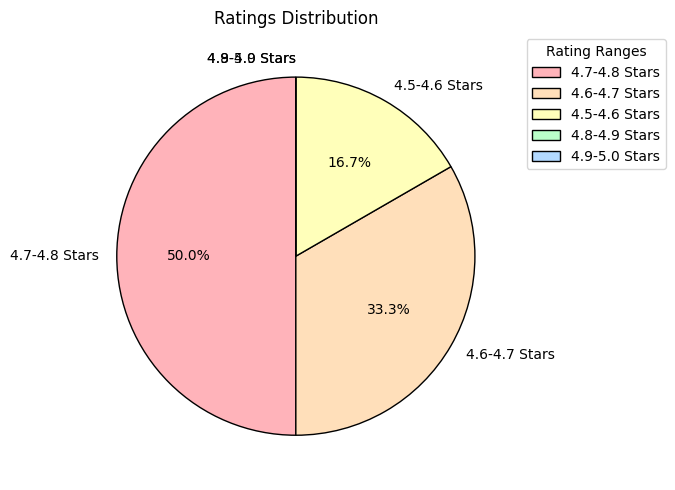

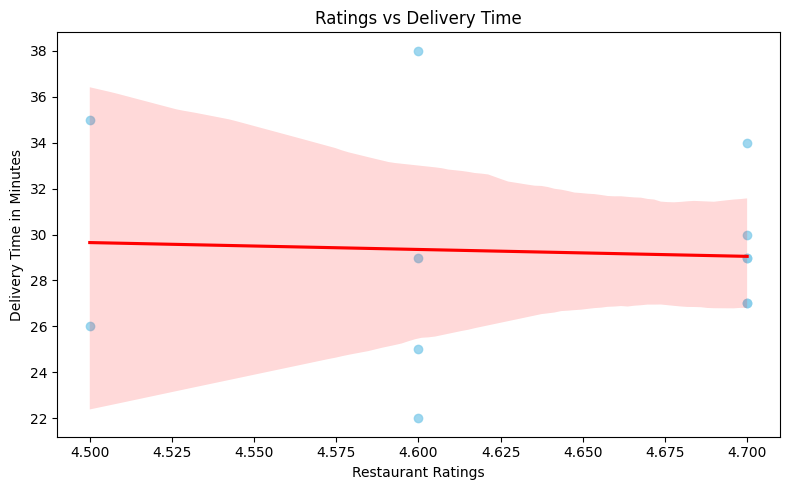

In [48]:
# Sushi

import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "doordash_sushi_20250305_195217.json"
with open(file_path, "r", encoding="utf-8") as file:
    json_data = json.load(file)

df = pd.DataFrame.from_dict(json_data, orient="index")

df["ratings"] = df["ratings"].astype(float)
df["distance"] = df["distance"].str.replace(" mi", "", regex=False).astype(float)


df["delivery_time"] = df["delivery_time"].str.replace(" min", "", regex=False)
df["delivery_time"] = pd.to_numeric(df["delivery_time"], errors="coerce")  
df["delivery_time"].fillna(df["delivery_time"].median(), inplace=True)  
df["delivery_time"] = df["delivery_time"].astype(int)  

# print(df.head)

# Restaurant Ratings 

plt.figure(figsize=(8, 5))
bars = plt.bar(df["restaurant_name"], df["ratings"], color='skyblue')

for bar, num_ratings in zip(bars, df["no_of_ratings"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 0.05, 
             f"{num_ratings}", ha='center', va='center', color='black', fontsize=10)

plt.plot([], [], color='skyblue', label="Ratings")
plt.plot([], [], color='black', marker='o', label="Number of Ratings inside bars")

plt.xlabel("Restaurant Name")
plt.ylabel("Ratings")
plt.title("Restaurant Ratings")
plt.xticks(rotation=20, ha="right")
plt.ylim(4.0, 5)
plt.legend(title="Legend", loc="upper left")
plt.tight_layout()
plt.show()

# Delivery Time Comparison

plt.figure(figsize=(8, 5))
bars = plt.bar(df["restaurant_name"], df["delivery_time"], color='salmon')

for bar, distance in zip(bars, df["distance"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 0.2, 
             f"{distance} mi", ha='center', va='center', color='black', fontsize=10)

plt.plot([], [], color='salmon', label="Delivery Time")
plt.plot([], [], color='black', marker='o', label="Delivery Distance inside bars")
plt.xlabel("Restaurant Name")
plt.ylabel("Delivery Time in Minutes")
plt.title("Delivery Time Comparison")
plt.xticks(rotation=20, ha="right")
plt.legend(title="Legend", loc="upper left")
plt.tight_layout()
plt.show()

# Delivery Distance Comparison

plt.figure(figsize=(8, 5))
plt.bar(df["restaurant_name"], df["distance"], color='pink')
plt.xlabel("Restaurant Name")
plt.ylabel("Distance in Miles")
plt.title("Delivery Distance Comparison")
plt.xticks(rotation=20, ha="right")
plt.show()

# Distance vs. Delivery Time

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["distance"], y=df["delivery_time"], s=100)
plt.title("Distance vs. Delivery Time")
plt.xlabel("Distance in Miles")
plt.ylabel("Delivery Time in Minutes")
plt.show()

# Rating Distribution

bins = [4.5, 4.6, 4.7, 4.8, 4.9, 5.0]
labels = ['4.5-4.6 Stars', '4.6-4.7 Stars', '4.7-4.8 Stars', '4.8-4.9 Stars', '4.9-5.0 Stars']
df['rating_range'] = pd.cut(df['ratings'], bins=bins, labels=labels, right=False)
rating_counts = df['rating_range'].value_counts()
colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#B3D9FF']

def func(pct, allvals):
    return f"{pct:.1f}%" if pct > 0 else ""

plt.figure(figsize=(8, 5))
plt.pie(rating_counts, labels=rating_counts.index, autopct=lambda pct: func(pct, rating_counts), 
        colors=colors, wedgeprops={'edgecolor': 'black'}, startangle=90)

plt.legend(rating_counts.index, title="Rating Ranges", loc="upper left", bbox_to_anchor=(1, 1))

plt.title("Ratings Distribution")
plt.tight_layout()
plt.show()

# Ratings vs. Delivery Time

plt.figure(figsize=(8, 5))
sns.regplot(x='ratings', y='delivery_time', data=df, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})

plt.xlabel("Restaurant Ratings")
plt.ylabel("Delivery Time in Minutes")
plt.title("Ratings vs Delivery Time")
plt.tight_layout()
plt.show()

/var/folders/v2/p4pj9mdj47x4n7f33pfpttz00000gn/T/ipykernel_94598/3954349742.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["delivery_time"].fillna(df1["delivery_time"].median(), inplace=True)
/var/folders/v2/p4pj9mdj47x4n7f33pfpttz00000gn/T/ipykernel_94598/3954349742.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

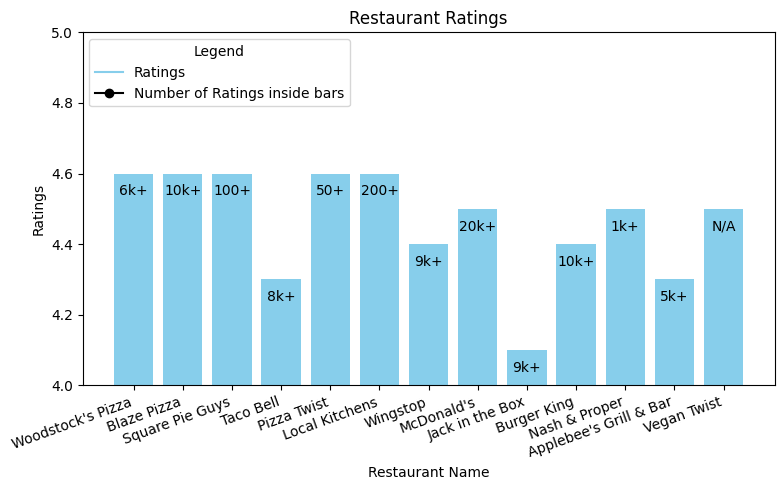

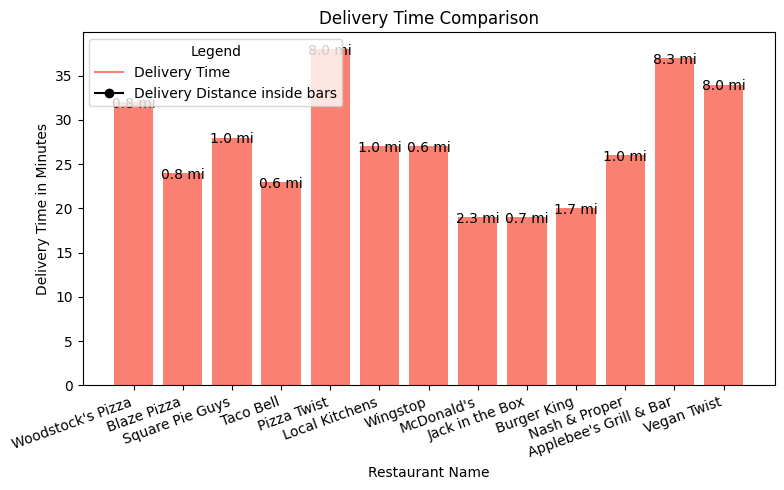

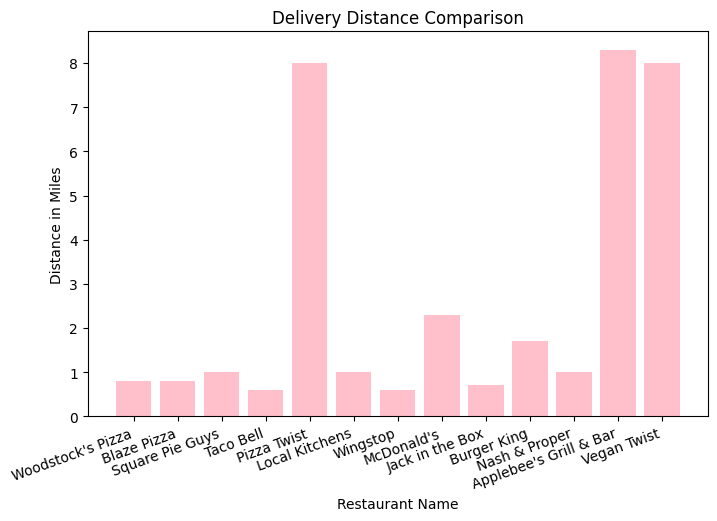

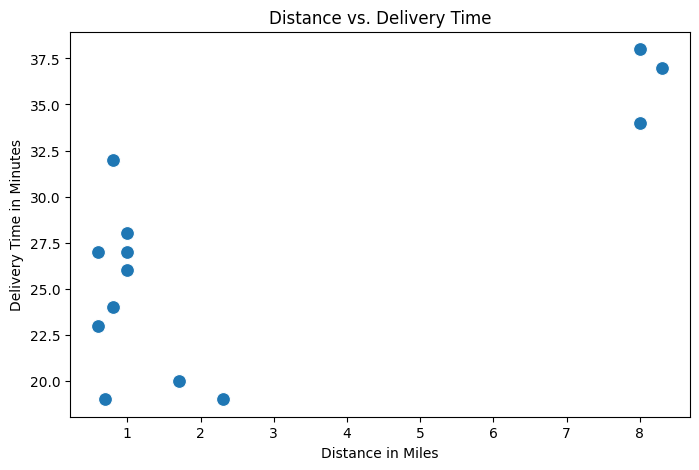

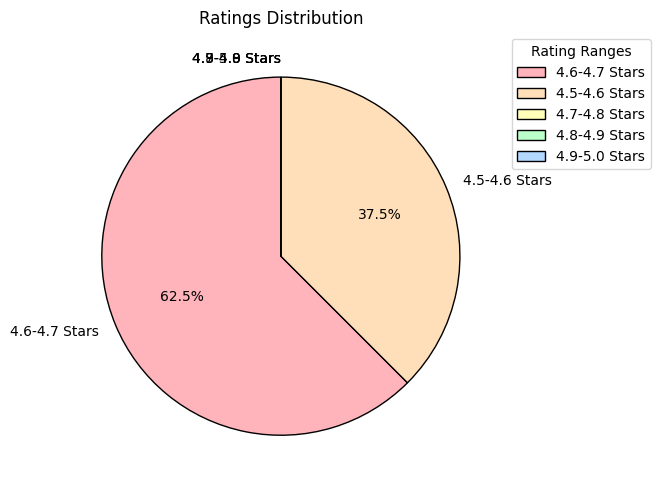

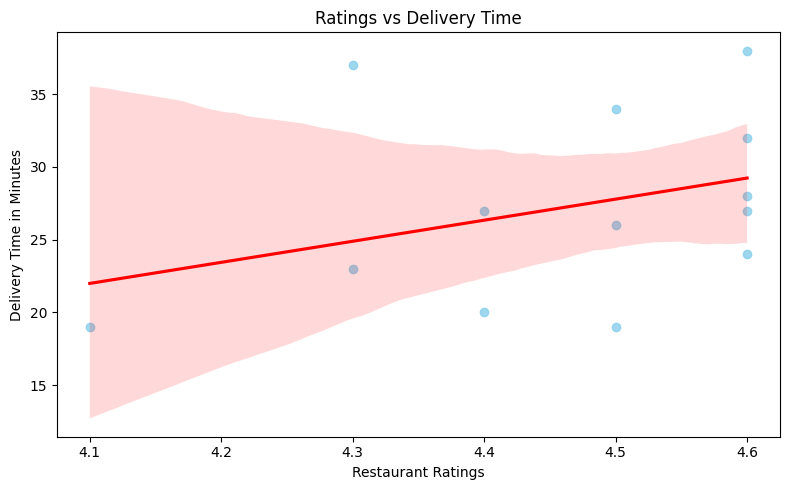

In [55]:
# Pizza

import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "doordash_pizza_20250306_231350.json"
with open(file_path, "r", encoding="utf-8") as file:
    json_data = json.load(file)

df1 = pd.DataFrame.from_dict(json_data, orient="index")
df1["distance"] = df1["distance"].str.replace(" mi", "", regex=False).astype(float)


df1["delivery_time"] = df1["delivery_time"].str.replace(" min", "", regex=False)
df1["delivery_time"] = pd.to_numeric(df1["delivery_time"], errors="coerce")  
df1["delivery_time"].fillna(df1["delivery_time"].median(), inplace=True)  
df1["delivery_time"] = df1["delivery_time"].astype(int)  

df1["ratings"] = pd.to_numeric(df1["ratings"], errors='coerce')
df1["ratings"].fillna(df1["ratings"].median(), inplace=True)
df1["ratings"] = df1["ratings"].astype(float)

# print(df1.head)

# Restaurant Ratings 

plt.figure(figsize=(8, 5))
bars = plt.bar(df1["restaurant_name"], df1["ratings"], color='skyblue')

for bar, num_ratings in zip(bars, df1["no_of_ratings"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 0.05, 
             f"{num_ratings}", ha='center', va='center', color='black', fontsize=10)

plt.plot([], [], color='skyblue', label="Ratings")
plt.plot([], [], color='black', marker='o', label="Number of Ratings inside bars")

plt.xlabel("Restaurant Name")
plt.ylabel("Ratings")
plt.title("Restaurant Ratings")
plt.xticks(rotation=20, ha="right")
plt.ylim(4.0, 5)
plt.legend(title="Legend", loc="upper left")
plt.tight_layout()
plt.show()

# Delivery Time Comparison

plt.figure(figsize=(8, 5))
bars = plt.bar(df1["restaurant_name"], df1["delivery_time"], color='salmon')

for bar, distance in zip(bars, df1["distance"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 0.2, 
             f"{distance} mi", ha='center', va='center', color='black', fontsize=10)

plt.plot([], [], color='salmon', label="Delivery Time")
plt.plot([], [], color='black', marker='o', label="Delivery Distance inside bars")
plt.xlabel("Restaurant Name")
plt.ylabel("Delivery Time in Minutes")
plt.title("Delivery Time Comparison")
plt.xticks(rotation=20, ha="right")
plt.legend(title="Legend", loc="upper left")
plt.tight_layout()
plt.show()

# Delivery Distance Comparison

plt.figure(figsize=(8, 5))
plt.bar(df1["restaurant_name"], df1["distance"], color='pink')
plt.xlabel("Restaurant Name")
plt.ylabel("Distance in Miles")
plt.title("Delivery Distance Comparison")
plt.xticks(rotation=20, ha="right")
plt.show()

# Distance vs. Delivery Time

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df1["distance"], y=df1["delivery_time"], s=100)
plt.title("Distance vs. Delivery Time")
plt.xlabel("Distance in Miles")
plt.ylabel("Delivery Time in Minutes")
plt.show()

# Rating Distribution

bins = [4.5, 4.6, 4.7, 4.8, 4.9, 5.0]
labels = ['4.5-4.6 Stars', '4.6-4.7 Stars', '4.7-4.8 Stars', '4.8-4.9 Stars', '4.9-5.0 Stars']
df1['rating_range'] = pd.cut(df1['ratings'], bins=bins, labels=labels, right=False)
rating_counts = df1['rating_range'].value_counts()
colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#B3D9FF']

def func(pct, allvals):
    return f"{pct:.1f}%" if pct > 0 else ""

plt.figure(figsize=(8, 5))
plt.pie(rating_counts, labels=rating_counts.index, autopct=lambda pct: func(pct, rating_counts), 
        colors=colors, wedgeprops={'edgecolor': 'black'}, startangle=90)

plt.legend(rating_counts.index, title="Rating Ranges", loc="upper left", bbox_to_anchor=(1, 1))

plt.title("Ratings Distribution")
plt.tight_layout()
plt.show()

# Ratings vs. Delivery Time

plt.figure(figsize=(8, 5))
sns.regplot(x='ratings', y='delivery_time', data=df1, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})

plt.xlabel("Restaurant Ratings")
plt.ylabel("Delivery Time in Minutes")
plt.title("Ratings vs Delivery Time")
plt.tight_layout()
plt.show()

/var/folders/v2/p4pj9mdj47x4n7f33pfpttz00000gn/T/ipykernel_94598/3699789603.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["delivery_time"].fillna(df1["delivery_time"].median(), inplace=True)
/var/folders/v2/p4pj9mdj47x4n7f33pfpttz00000gn/T/ipykernel_94598/3699789603.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

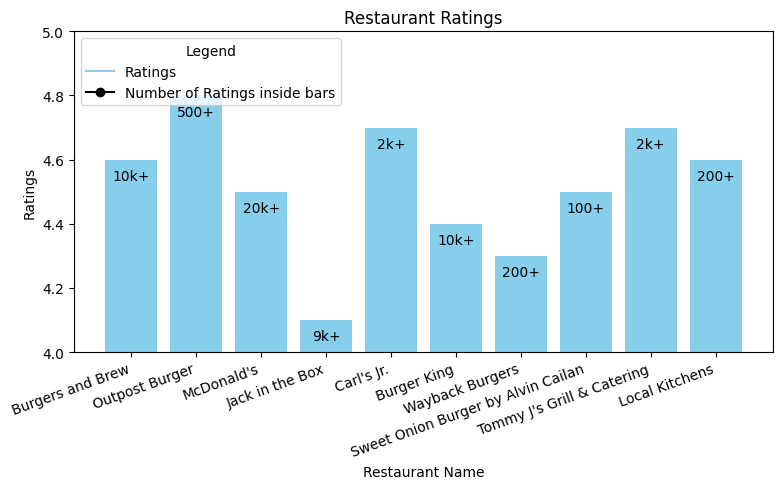

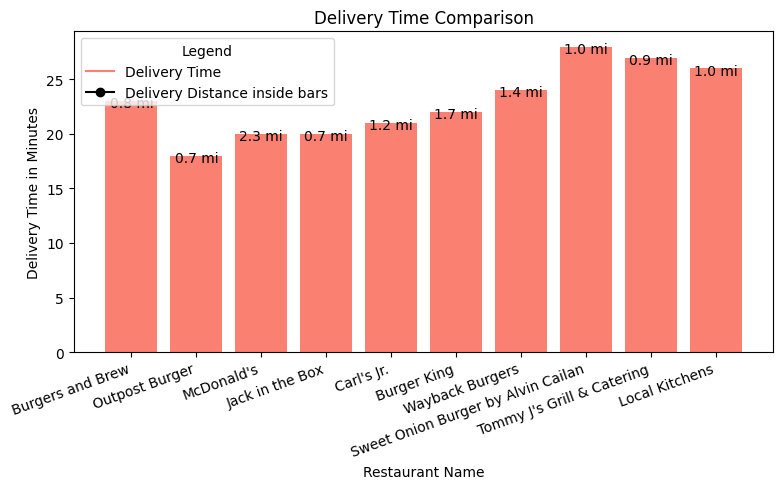

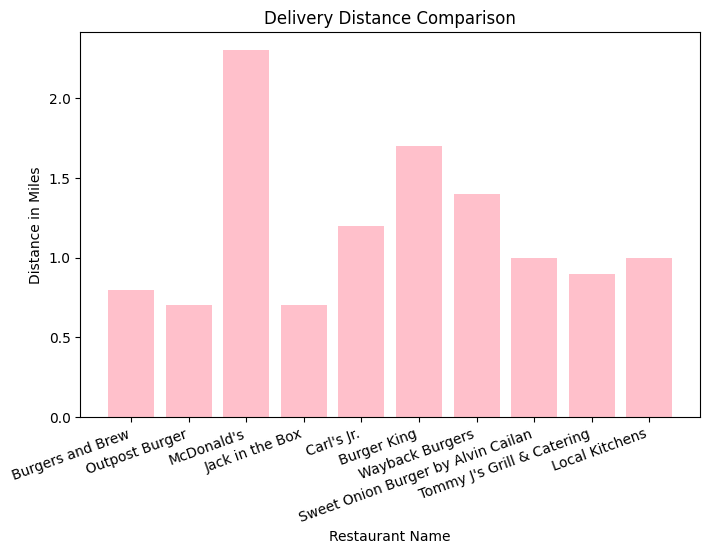

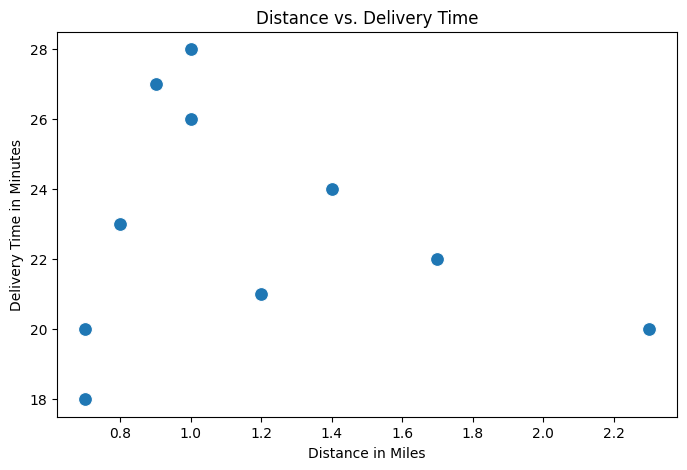

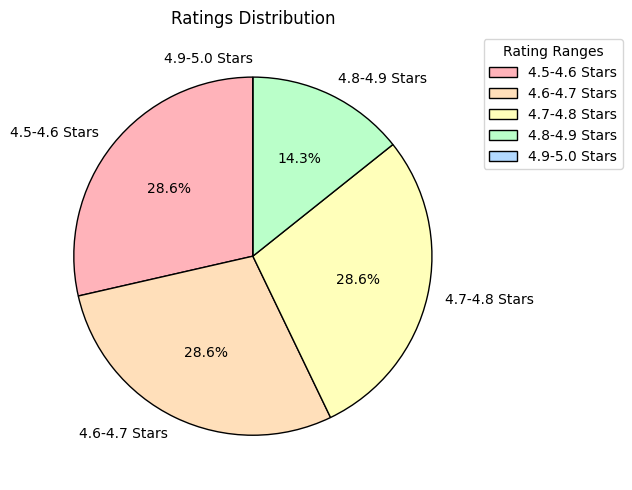

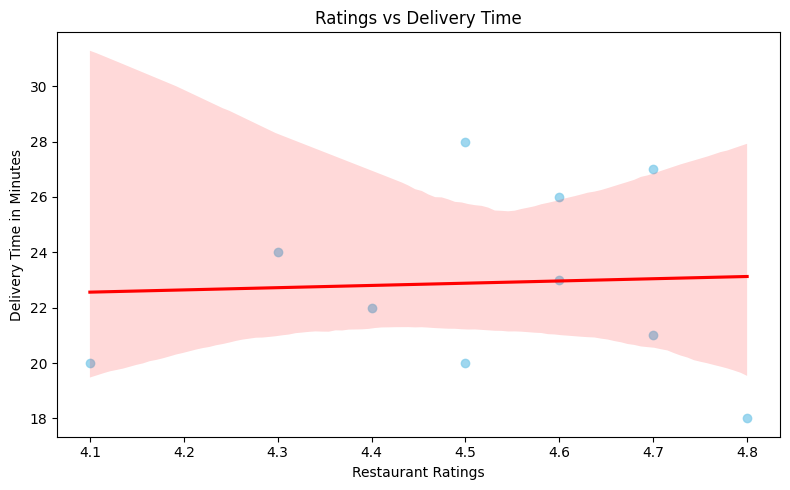

In [56]:
# Burger

import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "doordash_burger_20250314_134249.json"
with open(file_path, "r", encoding="utf-8") as file:
    json_data = json.load(file)

df1 = pd.DataFrame.from_dict(json_data, orient="index")
df1["distance"] = df1["distance"].str.replace(" mi", "", regex=False).astype(float)


df1["delivery_time"] = df1["delivery_time"].str.replace(" min", "", regex=False)
df1["delivery_time"] = pd.to_numeric(df1["delivery_time"], errors="coerce")  
df1["delivery_time"].fillna(df1["delivery_time"].median(), inplace=True)  
df1["delivery_time"] = df1["delivery_time"].astype(int)  

df1["ratings"] = pd.to_numeric(df1["ratings"], errors='coerce')
df1["ratings"].fillna(df1["ratings"].median(), inplace=True)
df1["ratings"] = df1["ratings"].astype(float)

# print(df1.head)

# Restaurant Ratings 

plt.figure(figsize=(8, 5))
bars = plt.bar(df1["restaurant_name"], df1["ratings"], color='skyblue')

for bar, num_ratings in zip(bars, df1["no_of_ratings"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 0.05, 
             f"{num_ratings}", ha='center', va='center', color='black', fontsize=10)

plt.plot([], [], color='skyblue', label="Ratings")
plt.plot([], [], color='black', marker='o', label="Number of Ratings inside bars")

plt.xlabel("Restaurant Name")
plt.ylabel("Ratings")
plt.title("Restaurant Ratings")
plt.xticks(rotation=20, ha="right")
plt.ylim(4.0, 5)
plt.legend(title="Legend", loc="upper left")
plt.tight_layout()
plt.show()

# Delivery Time Comparison

plt.figure(figsize=(8, 5))
bars = plt.bar(df1["restaurant_name"], df1["delivery_time"], color='salmon')

for bar, distance in zip(bars, df1["distance"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 0.2, 
             f"{distance} mi", ha='center', va='center', color='black', fontsize=10)

plt.plot([], [], color='salmon', label="Delivery Time")
plt.plot([], [], color='black', marker='o', label="Delivery Distance inside bars")
plt.xlabel("Restaurant Name")
plt.ylabel("Delivery Time in Minutes")
plt.title("Delivery Time Comparison")
plt.xticks(rotation=20, ha="right")
plt.legend(title="Legend", loc="upper left")
plt.tight_layout()
plt.show()

# Delivery Distance Comparison

plt.figure(figsize=(8, 5))
plt.bar(df1["restaurant_name"], df1["distance"], color='pink')
plt.xlabel("Restaurant Name")
plt.ylabel("Distance in Miles")
plt.title("Delivery Distance Comparison")
plt.xticks(rotation=20, ha="right")
plt.show()

# Distance vs. Delivery Time

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df1["distance"], y=df1["delivery_time"], s=100)
plt.title("Distance vs. Delivery Time")
plt.xlabel("Distance in Miles")
plt.ylabel("Delivery Time in Minutes")
plt.show()

# Rating Distribution

bins = [4.5, 4.6, 4.7, 4.8, 4.9, 5.0]
labels = ['4.5-4.6 Stars', '4.6-4.7 Stars', '4.7-4.8 Stars', '4.8-4.9 Stars', '4.9-5.0 Stars']
df1['rating_range'] = pd.cut(df1['ratings'], bins=bins, labels=labels, right=False)
rating_counts = df1['rating_range'].value_counts()
colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#B3D9FF']

def func(pct, allvals):
    return f"{pct:.1f}%" if pct > 0 else ""

plt.figure(figsize=(8, 5))
plt.pie(rating_counts, labels=rating_counts.index, autopct=lambda pct: func(pct, rating_counts), 
        colors=colors, wedgeprops={'edgecolor': 'black'}, startangle=90)

plt.legend(rating_counts.index, title="Rating Ranges", loc="upper left", bbox_to_anchor=(1, 1))

plt.title("Ratings Distribution")
plt.tight_layout()
plt.show()

# Ratings vs. Delivery Time

plt.figure(figsize=(8, 5))
sns.regplot(x='ratings', y='delivery_time', data=df1, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})

plt.xlabel("Restaurant Ratings")
plt.ylabel("Delivery Time in Minutes")
plt.title("Ratings vs Delivery Time")
plt.tight_layout()
plt.show()

Fetch the Menu Price after hitting Search

In [7]:
import undetected_chromedriver as uc
import chromedriver_py
import time
import random
import traceback
import json
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, WebDriverException

# Set up Chrome options
options = Options()
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36")

# Get the ChromeDriver path using chromedriver_py
driver_path = chromedriver_py.binary_path

def navigate_and_search():
    # Initialize undetected ChromeDriver
    driver = None
    restaurants_data = {}
    
    try:
        # Set up Chrome options to prevent timeout
        options.add_argument('--no-sandbox')
        options.add_argument('--disable-dev-shm-usage')
        
        # Initialize the driver with extended timeout
        driver = uc.Chrome(
            executable_path=driver_path, 
            options=options, 
            timeout=180  # Increased timeout to 3 minutes
        )
        
        # Set page load timeout
        driver.set_page_load_timeout(60)
        
        # Navigate to the restaurant URL
        restaurant_url = 'https://www.doordash.com/store/240255?cursor=eyJzZWFyY2hfaXRlbV9jYXJvdXNlbF9jdXJzb3IiOnsicXVlcnkiOiJzdXNoaSIsIml0ZW1faWRzIjpbXSwic2VhcmNoX3Rlcm0iOiJzdXNoaSIsInZlcnRpY2FsX2lkIjotOTk5LCJ2ZXJ0aWNhbF9uYW1lIjoiYWxsIn0sInN0b3JlX3ByaW1hcnlfdmVydGljYWxfaWRzIjpbMSw0LDE3N119&pickup=false'
        driver.get(restaurant_url)
        
        # Wait for page to load completely
        WebDriverWait(driver, 30).until(
            EC.presence_of_element_located((By.TAG_NAME, 'body'))
        )
        
        # Extract restaurant information
        restaurant_id = "240255"  # From URL
        
        # Wait for restaurant name to load
        WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "h1[data-testid='store-title']"))
        )
        
        # Extract restaurant details
        restaurant_name = driver.find_element(By.CSS_SELECTOR, "h1[data-testid='store-title']").text
        
        # Try to get the restaurant type (might be in different locations)
        try:
            store_type = driver.find_element(By.CSS_SELECTOR, "span[data-testid='cuisineLabel']").text
        except:
            store_type = "Not specified"
        
        # Get ratings
        try:
            rating_element = driver.find_element(By.CSS_SELECTOR, "span[data-testid='rating']")
            rating = rating_element.text
        except:
            rating = "Not available"
        
        # Get number of ratings
        try:
            ratings_count_element = driver.find_element(By.CSS_SELECTOR, "span[data-testid='ratings-count']")
            no_of_ratings = ratings_count_element.text.strip("()")
        except:
            no_of_ratings = "Not available"
        
        # Get distance and delivery time
        try:
            delivery_info = driver.find_element(By.CSS_SELECTOR, "div[data-testid='delivery-info']").text
            delivery_parts = delivery_info.split('•')
            distance = delivery_parts[0].strip() if len(delivery_parts) > 0 else "Not available"
            delivery_time = delivery_parts[1].strip() if len(delivery_parts) > 1 else "Not available"
        except:
            distance = "Not available"
            delivery_time = "Not available"
        
        # Add random delay to mimic human behavior
        time.sleep(random.uniform(2, 4))
        
        # Find search input
        try:
            # Try WebDriverWait first
            search_bar = WebDriverWait(driver, 20).until(
                EC.presence_of_element_located((By.XPATH, "//input[@id='item-search-field']"))
            )
        except TimeoutException:
            # Fallback to direct find_element
            search_bar = driver.find_element(By.XPATH, "//input[@id='item-search-field']")
        
        # Input search term
        search_input = input("Enter the item you want to search for: ")
        
        # Clear any existing text in the search bar
        search_bar.clear()
        
        # Enter the search term into the search bar
        search_bar.send_keys(search_input)
        
        # Press Enter to trigger the search
        search_bar.send_keys(Keys.RETURN)
        
        # Wait for search results to load using the correct XPath
        WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.XPATH, "//div[@data-anchor-id='MenuItem']"))
        )
        
        # Give a little more time for all items to load
        time.sleep(random.uniform(3, 5))
        
        print(f"Search for '{search_input}' completed. Now extracting menu items...")
        
        # Extract menu items using the correct XPath
        menu_items = []
        item_containers = driver.find_elements(By.XPATH, "//div[@data-anchor-id='MenuItem']")
        
        for container in item_containers:
            try:
                # Get item name - from the h3 element with class containing "title"
                item_name = container.find_element(By.XPATH, ".//h3[contains(@class, 'sc-761095a3-10') or contains(@data-telemetry-id, 'storeMenuItem.title')]").text
                
                # Get item price - from span with data-anchor-id="StoreMenuItemPrice"
                price_element = container.find_element(By.XPATH, ".//span[@data-anchor-id='StoreMenuItemPrice']")
                price = price_element.text
                
                # Add item to menu list
                menu_items.append({
                    "item": item_name,
                    "price": price
                })
                
                print(f"Found item: {item_name} - {price}")
                
            except Exception as item_error:
                print(f"Error extracting menu item: {str(item_error)}")
                continue
        
        # Create restaurant data structure
        restaurants_data[restaurant_id] = {
            "restaurant_id": restaurant_id,
            "restaurant_name": restaurant_name,
            "type": store_type,
            "ratings": rating,
            "no_of_ratings": no_of_ratings,
            "distance": distance,
            "delivery_time": delivery_time,
            "URL": restaurant_url,
            "menu": menu_items
        }
        
        # Save data to JSON file
        with open('restaurant_data.json', 'w', encoding='utf-8') as f:
            json.dump(restaurants_data, f, ensure_ascii=False, indent=4)
        
        print(f"Successfully extracted {len(menu_items)} menu items from {restaurant_name}")
        print(f"Data saved to restaurant_data.json")
        
        # Take screenshot for verification
        driver.save_screenshot('search_results.png')
        
        return restaurants_data
    
    except Exception as e:
        print("Detailed Error Information:")
        print(f"Error Type: {type(e).__name__}")
        print(f"Error Message: {str(e)}")
        print("\nFull Traceback:")
        traceback.print_exc()
        
        # If we have partial data, still save it
        if restaurants_data:
            with open('restaurant_data_partial.json', 'w', encoding='utf-8') as f:
                json.dump(restaurants_data, f, ensure_ascii=False, indent=4)
            print("Partial data saved to restaurant_data_partial.json")
        
        return restaurants_data
    
    finally:
        # Ensure driver is closed
        if driver:
            driver.quit()

# Function to extract menu items with fallback methods
def extract_menu_items(driver, restaurant_id):
    menu_items = []
    
    # Try multiple methods to find menu items
    selectors = [
        "//div[@data-anchor-id='MenuItem']",  # Primary XPath provided
        "//div[@data-testid='MenuItem']",     # Alternative testid
        "//div[contains(@class, 'MenuItem')]" # Class-based fallback
    ]
    
    for selector in selectors:
        try:
            item_containers = driver.find_elements(By.XPATH, selector)
            if item_containers:
                for container in item_containers:
                    try:
                        # Multiple selectors for item name
                        name_selectors = [
                            ".//h3[contains(@data-telemetry-id, 'storeMenuItem.title')]",
                            ".//h3",
                            ".//div[contains(@class, 'title')]"
                        ]
                        
                        item_name = None
                        for name_selector in name_selectors:
                            try:
                                item_name = container.find_element(By.XPATH, name_selector).text
                                if item_name:
                                    break
                            except:
                                continue
                        
                        if not item_name:
                            continue
                        
                        # Multiple selectors for item price
                        price_selectors = [
                            ".//span[@data-anchor-id='StoreMenuItemPrice']",
                            ".//span[contains(text(), '$')]",
                            ".//span[contains(@class, 'price')]"
                        ]
                        
                        price = None
                        for price_selector in price_selectors:
                            try:
                                price_element = container.find_element(By.XPATH, price_selector)
                                price = price_element.text
                                if price and '$' in price:
                                    break
                            except:
                                continue
                        
                        if not price:
                            continue
                        
                        # Add item to menu list
                        menu_items.append({
                            "item": item_name,
                            "price": price
                        })
                        
                        print(f"Found item: {item_name} - {price}")
                        
                    except Exception as item_error:
                        print(f"Error extracting menu item: {str(item_error)}")
                        continue
                
                # If we found items with this selector, stop trying others
                if menu_items:
                    break
        except Exception as selector_error:
            print(f"Error with selector {selector}: {str(selector_error)}")
            continue
    
    return menu_items

# Main execution
if __name__ == "__main__":
    try:
        result = navigate_and_search()
        
        if not result:
            print("Navigation and search returned no data.")
        
    except Exception as e:
        print(f"Unexpected error: {e}")

Detailed Error Information:
Error Type: TimeoutException
Error Message: Message: timeout: Timed out receiving message from renderer: 59.340
  (Session info: chrome=134.0.6998.45)
Stacktrace:
0   undetected_chromedriver             0x0000000100d89922 undetected_chromedriver + 5843234
1   undetected_chromedriver             0x0000000100d815ea undetected_chromedriver + 5809642
2   undetected_chromedriver             0x000000010085ddfe undetected_chromedriver + 421374
3   undetected_chromedriver             0x00000001008447ec undetected_chromedriver + 317420
4   undetected_chromedriver             0x0000000100844519 undetected_chromedriver + 316697
5   undetected_chromedriver             0x00000001008423cf undetected_chromedriver + 308175
6   undetected_chromedriver             0x0000000100842d94 undetected_chromedriver + 310676
7   undetected_chromedriver             0x00000001008524b0 undetected_chromedriver + 373936
8   undetected_chromedriver             0x000000010086cd42 undetected_c

Traceback (most recent call last):
  File "/var/folders/v2/p4pj9mdj47x4n7f33pfpttz00000gn/T/ipykernel_78393/3234843294.py", line 44, in navigate_and_search
    driver.get(restaurant_url)
  File "/Users/priya/Downloads/UC Davis/Assignments/venv/lib/python3.9/site-packages/undetected_chromedriver/__init__.py", line 665, in get
    return super().get(url)
  File "/Users/priya/Downloads/UC Davis/Assignments/venv/lib/python3.9/site-packages/selenium/webdriver/remote/webdriver.py", line 454, in get
    self.execute(Command.GET, {"url": url})
  File "/Users/priya/Downloads/UC Davis/Assignments/venv/lib/python3.9/site-packages/selenium/webdriver/remote/webdriver.py", line 429, in execute
    self.error_handler.check_response(response)
  File "/Users/priya/Downloads/UC Davis/Assignments/venv/lib/python3.9/site-packages/selenium/webdriver/remote/errorhandler.py", line 232, in check_response
    raise exception_class(message, screen, stacktrace)
selenium.common.exceptions.TimeoutException: Messag